In [1]:
import pandas as pd 
import numpy as np
import math
from matplotlib import cm
from numpy.random import uniform
from scipy.stats import kstest, t, norm
import matplotlib.pyplot as plt
from matplotlib import mlab
import pylab

In [2]:
#Количество экспериментов
N = 10000
# Характеристики слоев
mua = [32, 23,40, 23 ,46,51];
mus = [165,227,246,227,253,186];
g = [0.72 , 0.72 ,0.72,0.72 , 0.72,0.8]
d = [0.01 , 0.02, 0.02 , 0.09 , 0.06 ,0.02];
l = sum(d) - d[5];
#lmbda = 337
m = 10
Wp = 0.0001
r = 0.01

In [3]:
print(l)

0.2


In [4]:
# Обратная функция Хэньи-Гринштейна
def F(x,num):
    if g[num] == 0 :
        return (2*x-1);
    return (1/(2*g[num]))*(1+g[num]**2 - ((1-g[num]**2)/(1 - g[num]+2*g[num]*x))**2)

In [5]:
#Функция проверки нахождения точки внутри неоднородности
def incir(a):
    return (a[0])**2+(a[1])**2 + (a[2] + d[5])**2 <= r*r;

In [6]:
sign = lambda x: (1, -1)[x<0]

In [7]:
#коэфицент пропускания
coefm = 0 ;
#коэфицент отражения
coefr = 0; 
#вектора координат поглощенных фотонов 
xx = []
yy = []
zz = []
ww = []
#Вектор направлений поглощенный фотонов
vx = []
vy = []
vz = []
#вектора отраженных координат
ox = []
oy = []
oz = []
ow = []

In [8]:
for i in range(1,N+1):
    W = 1
    #Текущие координаты
    coord = [0]*3
    #Нормированный вектор направлений
    drct = [0,0,-1];
    #номер  текущего слоя
    num = 0;
    # print(i);
    #Цикл движения
    while 1:
    #    print(coord)
    #   print(drct)
      #     print(drct);
        #Генерация свободного пробега
        mu = np.random.exponential(1/(mua[num]+mus[num]))
      #  print(mu);
        coord[0] = coord[0] + drct[0]*mu;
        coord[1] = coord[1] + drct[1]*mu
        coord[2] = coord[2] + drct[2]*mu
        #Случай выхода фотона за пределы среды
        if (coord[2] > 0 or coord[2] < -l)  and not incir(coord):
            ox.append(coord[0])
            oy.append(coord[1])
            oz.append(coord[2])
            ow.append(W)
            vx.append(drct[0])
            vy.append(drct[1])
            vz.append(drct[2])
            if(coord[2] < -l):
                coefm = coefm+1;
            else:
                coefr = coefr+1;
            break
            
        s = 0;
        #Поиск текущего слоя нахождения
        for i in (0,len(d) - 1):
            if(coord[2] > s-d[i]):
                num = i;
                break;
            s-=d[i]
        if(incir(coord)):
            num = 5;
        
 #       print(num)
        #Имитация изменения веса фотона при взаимодействии со средой 
        W = W - W * mua[num]/(mua[num]+mus[num]);
        if W < Wp: 
            pm  = uniform();
            if pm < 1/m:
                W = m*W
            else:
                xx.append(coord[0])
                yy.append(coord[1])
                zz.append(coord[2])
                ww.append(W)
                break
        #имитация рассеивания и поглощения
        p = uniform();
 #        print(p)
 #       print(mua[num]/(mua[num]+mus[num]));
        if (p <= mua[num] / (mua[num]+mus[num])):
            xx.append(coord[0])
            yy.append(coord[1])
            zz.append(coord[2])
            ww.append(W)
            break;
        
        #Генерация cos(theta)
        thetacos = F(uniform(),num)
        theta = np.arccos(thetacos)
        phi = uniform()* 2 * np.pi
        V = [0]*3
        V[0]= drct[0]
        V[1] = drct[1]
        V[2]= drct[2];
        #Изменяем координаты направляющего вектора
        if abs(drct[2]) == 1:
            drct[0] = np.sin(theta)*np.cos(phi)
            drct[1] = np.sin(theta)*np.sin(phi)
            drct[2] = sign(drct[2])*np.cos(theta)
        else:
            drct[0] = V[0]*np.cos(theta)+(np.sin(theta)/np.sqrt(1 -V[2]**2))*(V[0]*V[2]*np.cos(phi) - V[1]*np.sin(phi));
            drct[1] = V[1]*np.cos(theta)+(np.sin(theta)/np.sqrt(1 - V[2]**2))*(V[1]*V[2]*np.cos(phi) + V[0]*np.sin(phi))
            drct[2] = V[2]*np.cos(theta) - np.sin(theta)*np.cos(phi)*np.sqrt(1 - V[2]**2)
 #      print(W)
  

In [9]:
#Пропускание
print(coefm);
#Отражение
print(coefr);

print(coefm/N);
print(coefr/N)


0
1009
0.0
0.1009


In [10]:
d = 0.014
n =  (int)(math.ceil(1/d));
m = (int)(math.ceil(1/d))
matr = [[0]*n for i in range(m)]

In [11]:
for i in range(0,len(xx)):
    matr[(int)(math.floor(xx[i]/d))][(int)(math.floor(zz[i]/d))]+=1;

In [12]:
print(len(xx))
print(len(yy))
print(len(zz))

8991
8991
8991


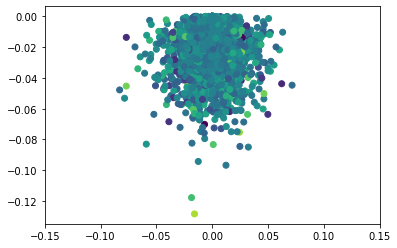

In [13]:
# График плотности
plt.scatter(xx, zz,c = yy)#plt.plot(xx,zz,color = "red",type = "p")
#plt.scatter(xx[0],zz[0])
#plt.scatter(xx[1],zz[1])
#plt.scatter(xx[2],zz[2])
plt.xlim(-0.15,0.15)
plt.show()

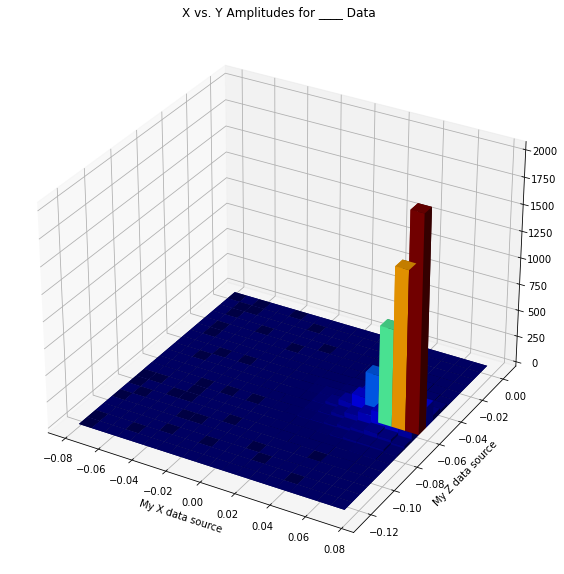

In [14]:
fig = plt.figure(figsize=(10,10))          
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(xx, zz, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') 
max_height = np.max(dz)   
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My X data source")
plt.ylabel("My Z data source")
plt.savefig("Your_title_goes_here")
plt.show()


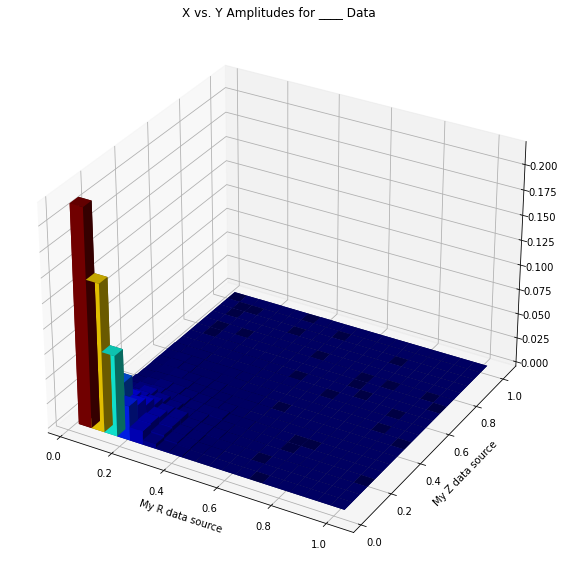

In [19]:
rr = [0]*len(xx)
zzz = [0]*len(zz)
mxz = min(zz)
for i in range(0,len(zz)):
    zzz[i] = zz[i]/mxz
for i in range(0,len(xx)):
    rr[i] = math.sqrt(xx[i]*xx[i]+yy[i]*yy[i])
mx = max(rr);
for i in range(0,len(rr)):
    rr[i] = rr[i]/mx
#print(mx);
#print(mxz)
fig = plt.figure(figsize=(10,10))          
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(rr, zzz, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
#print(dz)
#print(dx)
#print(dy)
#print(len(xx))
#print(zpos)
for i in range(0,len(dz)):
    dz[i] = dz[i]/len(xx)
cmap = cm.get_cmap('jet') 
max_height = np.max(dz)   
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My R data source")
plt.ylabel("My Z data source")
plt.savefig("Your_title_goes_here")
plt.show()

In [16]:
print(max(vz))
print(min(vz))

0.9986921430089477
0.01706246008480939


In [17]:
rrr = [0]*len(ox)
for i in range(0,len(ox)):
    rrr[i] = math.sqrt(ox[i]*ox[i]+oy[i]*oy[i]+oz[i]*oz[i])
alphas = [0]*len(ox);
for i in range(0,len(ox)):
    alphas[i] = np.arccos(vz[i])
WW = [[0]*21 for i in range(21)]
sz1 = (max(rrr) -min(rrr))/20+0.0001
sz2 = (max(alphas) - min(alphas))/20+0.0001
dw = []
    #mxx = max(mxx,((int)(np.floor(rrr[i]/sz1))))
#print(mxx)
for i in range(0,len(ow)):
    WW[(int)(np.floor(rrr[i] / sz1))][(int)(np.floor(alphas[i]/sz2))]+= ow[i]/len(ox)
#print(WW)
for i in range(0,20):
    for j in range(0,20):
        dw.append(WW[i][j])
minr = min(rrr)
maxr = max(rrr)
for i in range(0,len(rrr)):
    rrr[i] = (rrr[i]  - minr)/maxr
mina = min(alphas);
maxa = max(alphas)
for i in range(0,len(alphas)):
    alphas[i] = (alphas[i] - mina)/maxa

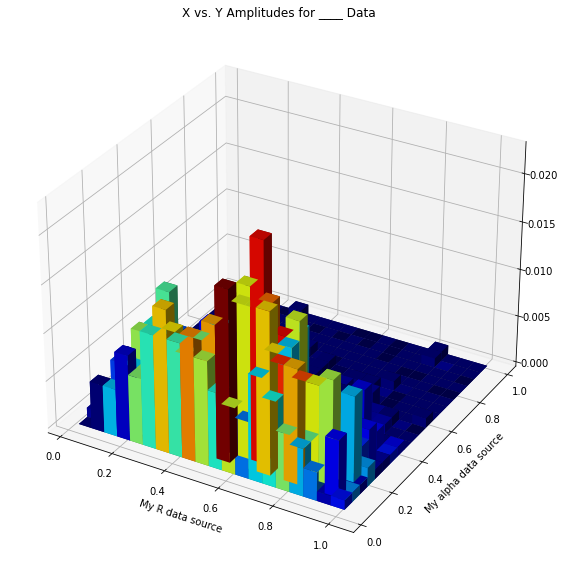

In [18]:
fig = plt.figure(figsize=(10,10))          
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(rrr, alphas, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
for i in range(0,len(dz)):
    dz[i] = dz[i] /len(ox)#print(dz)
#print(dx)
#print(dy)
#print(len(xx))
#print(zpos)
cmap = cm.get_cmap('jet') 
max_height = np.max(dw)   
min_height = np.min(dw)
# scale each z to [0,1], and get their rgb values
#rgba = [cmap((k)) for k in ww] 
rgba = [cmap((k-min_height)/max_height) for k in dw] 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My R data source")
plt.ylabel("My alpha data source")
plt.savefig("Your_title_goes_here")
plt.show()